In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_results_merged = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])
mouse_results_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Check the number of rows in the dataset
mouse_count=mouse_results_merged["Mouse ID"].count()
mouse_count

1893

In [3]:
duplicate_mouse_ids = mouse_results_merged.loc[mouse_results_merged.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
mouse_clean = mouse_results_merged[mouse_results_merged['Mouse ID'].isin(duplicate_mouse_ids)==False]
mouse_clean.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [5]:
#Calculate Summary Statistics
mouse_mean=mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_median=mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_variance=mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_deviants=mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_sem=mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



In [6]:
#Create Summary Statistics DataFrame
mouse_stats_df = pd.DataFrame({
                              "Mean Tumor Size": mouse_mean,
                              "Median Tumor Size": mouse_median,
                              "Variance": mouse_variance,
                              "Standard Deviation": mouse_deviants,
                              "SEM": mouse_sem,
                              })
mouse_stats_df

,Mean Tumor Size,Median Tumor Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
#Use the aggregation method to generate summary statistics in one line
mouse_clean.groupby(mouse_clean["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen (remember .value_counts will give you unique values and counts)
mouse_timepoints=mouse_clean.groupby("Drug Regimen")
count_timepoints=mouse_timepoints["Timepoint"].value_counts()
count_timepoints

Drug Regimen  Timepoint
Capomulin     0            25
              5            25
              10           25
              15           24
              20           23
                           ..
Zoniferol     25           16
              30           15
              35           14
              40           14
              45           14
Name: Timepoint, Length: 100, dtype: int64

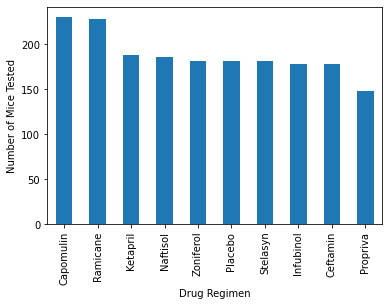

In [9]:
counts = mouse_clean['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

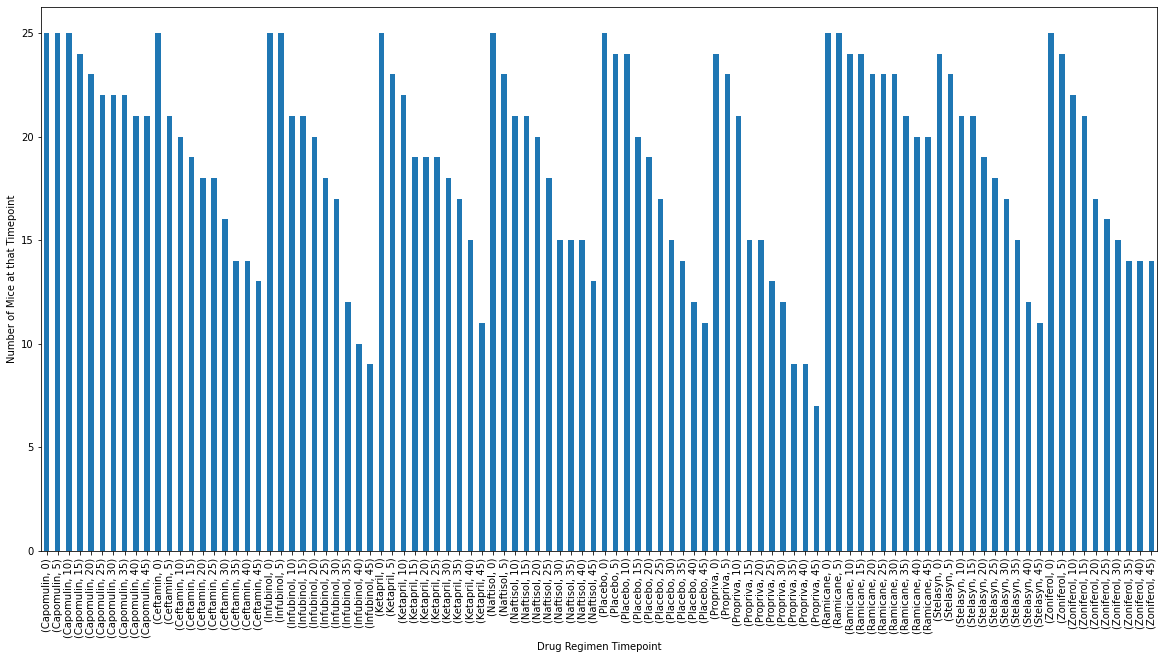

<Figure size 432x288 with 0 Axes>

In [10]:
#Bar chart using pandas
count_chart=count_timepoints.plot(kind='bar',figsize=(20,10))

count_chart.set_xlabel("Drug Regimen Timepoint")
count_chart.set_ylabel("Number of Mice at that Timepoint")

plt.show()
plt.tight_layout()

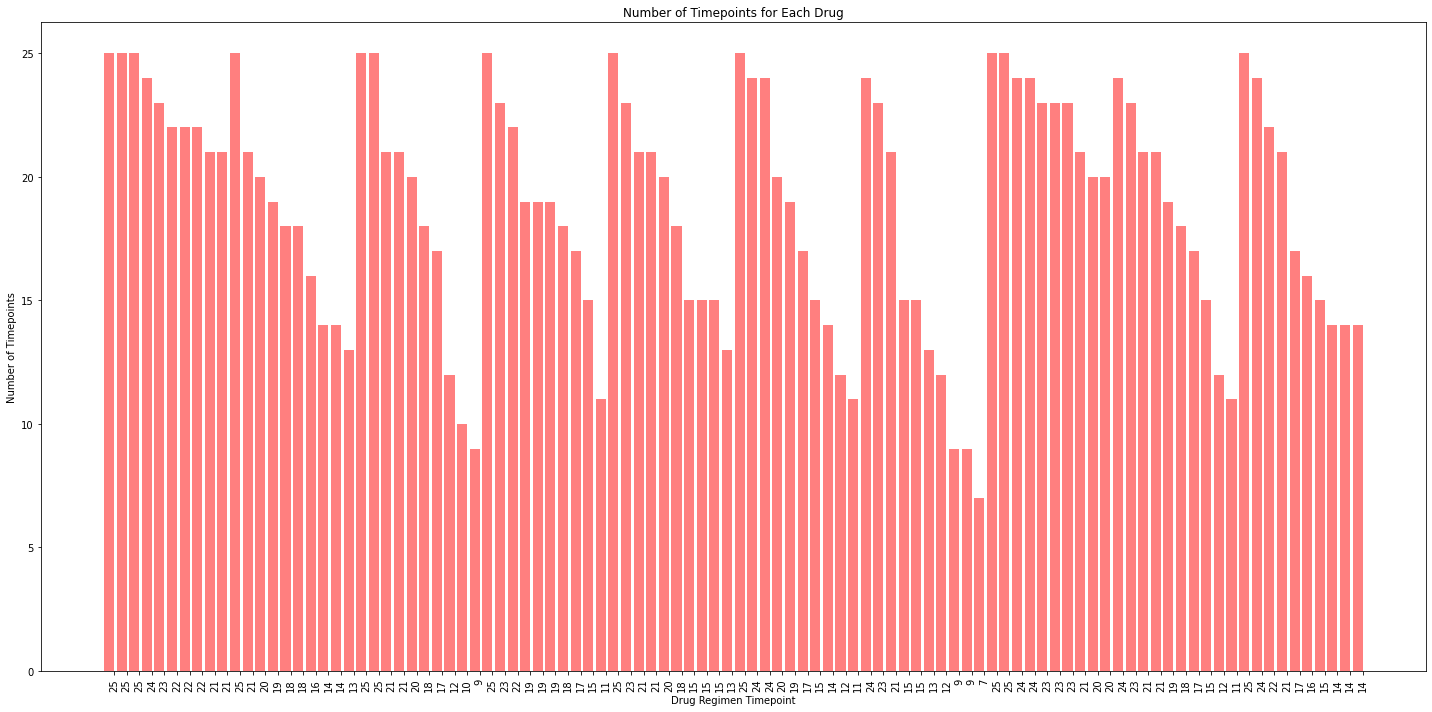

In [11]:
#Bar chart using matplotlib

x_axis=np.arange(len(count_timepoints))
tick_locations=[value+.4 for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, count_timepoints, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, count_timepoints, rotation="vertical")
plt.title("Number of Timepoints for Each Drug")
plt.xlabel("Drug Regimen Timepoint")
plt.ylabel("Number of Timepoints")
plt.tight_layout()
plt.show()




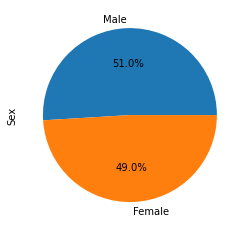

In [12]:
counts = mouse_clean.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

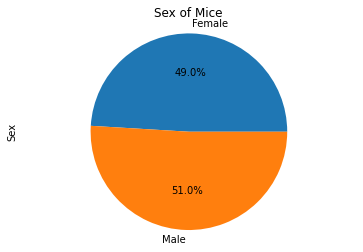

In [13]:
#Pie chart using Pandas
mouse_sex=mouse_clean.groupby(["Sex"])
mouse_sex_count=mouse_sex["Mouse ID"].count()
mouse_pie=mouse_sex_count.plot(kind="pie",y="Mouse ID", title="Sex of Mice",autopct="%1.1f%%")
mouse_pie.set_ylabel("Sex")


plt.axis("equal")
plt.show


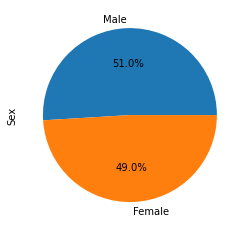

In [14]:
counts = mouse_clean.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

([<matplotlib.patches.Wedge at 0x7fb2eaf3ca30>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Male'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Female')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

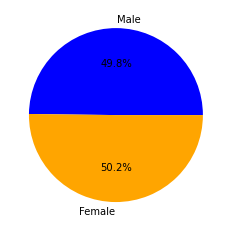

In [15]:
#Pie chart using matplotlib
labels=["Male", "Female"]
sizes=[124,125]
colors=["blue","orange"]
plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%")


In [18]:
#Extract the latest timepoint for each mouse

#mouse_drugs=mouse_clean.set_index(["Drug Regimen"])
mouse_drug_times=mouse_clean.groupby(["Mouse ID"])["Timepoint"].max()
mouse_drug_times=mouse_drug_times.reset_index()


In [19]:
#Merge data for tumor volume into data frame

#mouse_tumor_time=pd.merge(mouse_volume,mouse_drug_times,on=["Mouse ID","Timepoint"],how="left")
#mouse_tumor_time
merged_data = mouse_drug_times.merge(mouse_clean,on=['Mouse ID','Timepoint'],how="left")


In [21]:
drug_regimens=["Capomulin", "Ramicane","Infubinol","Ceftamin"]
tumor_vol=[]

for drug in drug_regimens:
        final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
        #print( final_tumor_vol)
 
        tumor_vol.append(final_tumor_vol)
    
   
        quartiles = final_tumor_vol.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
        print()

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



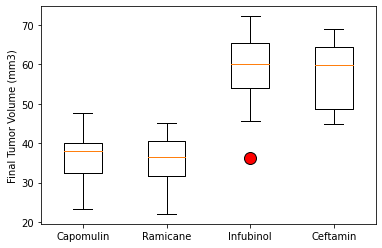

In [22]:
mouse_outlier = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol, labels = drug_regimens,flierprops=mouse_outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()